In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import matplotlib.image as mpimg
%matplotlib inline


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

image type is:  <class 'numpy.ndarray'>


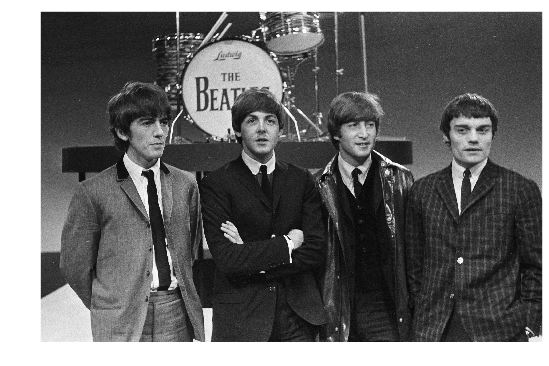

In [11]:
import cv2
# load in color image for face detection
image = cv2.imread('images/the_beatles.jpg')
print("image type is: ",type(image))
# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


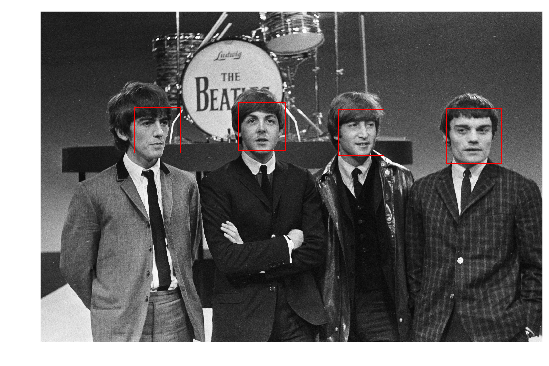

In [6]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.3, 5)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [13]:
from models import Net
import torch

net = Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load('saved_models/keypoints_model_epoch=10.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.1, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (drop2): Dropout(p=0.2, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (drop3): Dropout(p=0.3, inplace=False)
  (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
  (drop4): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=43264, out_features=1000, bias=True)
  (dropfc1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (dropfc2): Dropout(p=0.6, inplace=False)
  (fc3): Linear(in_features=1000, out_features=136, bias=True)
)

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




In [14]:
image.shape

(2406, 3648, 3)

In [12]:
for (x,y,w,h) in faces:
    print( (x, y), w, h)
    print('-----')

(1437, 671) 345 345
-----
(2948, 711) 400 400
-----
(687, 705) 331 331
-----
(2164, 722) 331 331
-----


keypoints [[ 60.220016  97.10289 ]
 [ 61.823647 110.39467 ]
 [ 63.96601  122.19507 ]
 [ 67.63855  133.52182 ]
 [ 71.61925  146.03403 ]
 [ 79.02722  157.09225 ]
 [ 87.4715   163.84795 ]
 [ 97.7876   170.29095 ]
 [113.674034 173.71048 ]
 [128.91933  169.22989 ]]
keypoints [[ 60.41702   97.21787 ]
 [ 62.092678 110.46672 ]
 [ 64.17107  122.20085 ]
 [ 67.94449  133.39526 ]
 [ 71.79678  145.8401  ]
 [ 79.15688  156.81702 ]
 [ 87.560356 163.57454 ]
 [ 97.76848  169.91396 ]
 [113.611786 173.3085  ]
 [128.70798  168.87964 ]]
keypoints [[ 58.53052   96.459984]
 [ 59.65453  110.03441 ]
 [ 62.31982  122.474594]
 [ 65.55971  134.75937 ]
 [ 70.40962  147.88028 ]
 [ 78.127716 159.40387 ]
 [ 86.783615 166.48148 ]
 [ 97.868416 173.48807 ]
 [114.2559   177.26419 ]
 [130.43887  172.2622  ]]
keypoints [[ 59.53569   96.78071 ]
 [ 60.88301  110.19252 ]
 [ 63.278294 122.20813 ]
 [ 66.7025   134.00282 ]
 [ 71.09796  146.72418 ]
 [ 78.61814  158.01622 ]
 [ 87.16467  164.79166 ]
 [ 97.84776  171.5792  ]
 [113.8

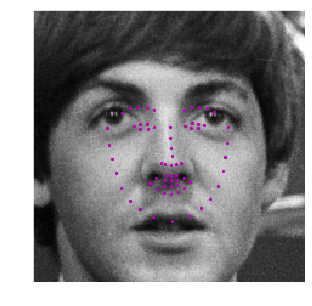

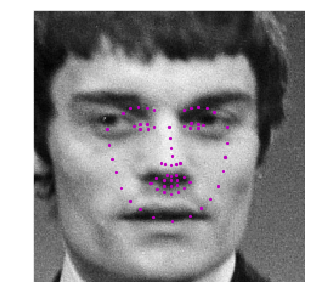

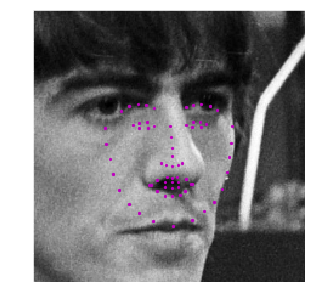

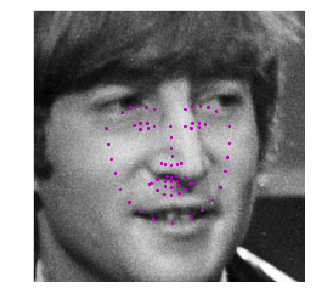

In [17]:
for (x,y,w,h) in faces:
    image_copy = np.copy(image)
    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y+h, x:x+w]
    #roi = image_copy[y:y + int(1.5 * h), x - int(0.5 * w):x + int(1.0 * w)] # the face images are too big
    
    ## TODO: Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    #plt.imshow(roi, cmap = 'gray')
    
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = roi / 255.
    
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi = cv2.resize(roi, (224, 224))
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi = np.reshape(roi, (1, 1, 224, 224))
    
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    ## perform a forward pass to get the predicted facial keypoints
    
    roi_torch = torch.from_numpy(roi) # convert from numpy to torch
    roi_torch = roi_torch.type(torch.FloatTensor) # convert to floatTensor
    # print(roi_torch.shape)
        
    keypoints = net(roi_torch)
    #print("input: ", roi_torch)
    
    keypoints = keypoints.data.numpy()
    keypoints = np.reshape(keypoints, (68, -1)) # reshape to 2 X 68 keypoint for the fase
    keypoints = keypoints * 50 + 100 # undo normalization of keypoints  
    print("keypoints", keypoints[:10])
    
    ## TODO: Display each detected face and the corresponding keypoints        
    
    plt.figure(figsize=(5,5))
    
    #print("roi_torch", roi_torch.shape)
    image_copy = roi_torch.squeeze(0).numpy() # remove the 4th dimension, convert to numpy
    #print("image_copy 1 squeeze", image_copy.shape)
    image_copy = np.transpose(image_copy, (1, 2, 0))  # change the dimension to numpy image shape (H x W x C)
    image_copy = np.squeeze(image_copy) # removes the color dimension
    #print("image_copy 2 squeeze", image_copy.shape)
    plt.imshow(image_copy, cmap='gray')
    plt.scatter(keypoints[:, 0], keypoints[:, 1], s=20, marker='.', c='m')

keypoints [[ 60.220016  97.10289 ]
 [ 61.823647 110.39467 ]
 [ 63.96601  122.19507 ]
 [ 67.63855  133.52182 ]
 [ 71.61925  146.03403 ]
 [ 79.02722  157.09225 ]
 [ 87.4715   163.84795 ]
 [ 97.7876   170.29095 ]
 [113.674034 173.71048 ]
 [128.91933  169.22989 ]]
keypoints [[ 60.41702   97.21787 ]
 [ 62.092678 110.46672 ]
 [ 64.17107  122.20085 ]
 [ 67.94449  133.39526 ]
 [ 71.79678  145.8401  ]
 [ 79.15688  156.81702 ]
 [ 87.560356 163.57454 ]
 [ 97.76848  169.91396 ]
 [113.611786 173.3085  ]
 [128.70798  168.87964 ]]
keypoints [[ 58.53052   96.459984]
 [ 59.65453  110.03441 ]
 [ 62.31982  122.474594]
 [ 65.55971  134.75937 ]
 [ 70.40962  147.88028 ]
 [ 78.127716 159.40387 ]
 [ 86.783615 166.48148 ]
 [ 97.868416 173.48807 ]
 [114.2559   177.26419 ]
 [130.43887  172.2622  ]]
keypoints [[ 59.53569   96.78071 ]
 [ 60.88301  110.19252 ]
 [ 63.278294 122.20813 ]
 [ 66.7025   134.00282 ]
 [ 71.09796  146.72418 ]
 [ 78.61814  158.01622 ]
 [ 87.16467  164.79166 ]
 [ 97.84776  171.5792  ]
 [113.8

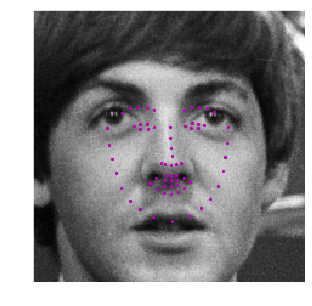

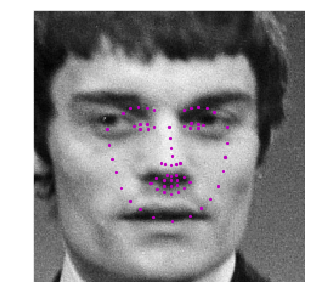

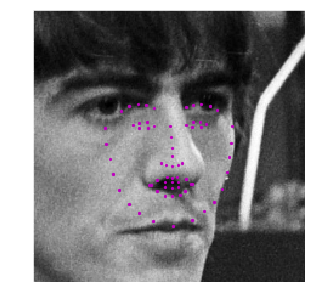

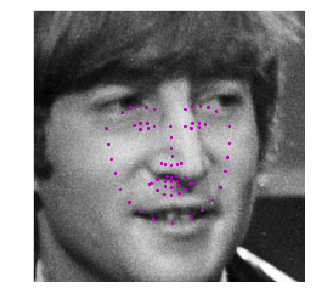

In [28]:
for (x,y,w,h) in faces:
    image_copy = np.copy(image)
    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y+h, x:x+w]
    #roi = image_copy[y:y + int(1.5 * h), x - int(0.5 * w):x + int(1.0 * w)] # the face images are too big
    
    ## TODO: Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    #plt.imshow(roi, cmap = 'gray')
    
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = roi / 255.
    
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi = cv2.resize(roi, (224, 224))
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi = np.reshape(roi, (1, 1, 224, 224))
    
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    ## perform a forward pass to get the predicted facial keypoints
    
    roi_torch = torch.from_numpy(roi) # convert from numpy to torch
    roi_torch = roi_torch.type(torch.FloatTensor) # convert to floatTensor
    # print(roi_torch.shape)
        
    keypoints = net(roi_torch)
    #print("input: ", roi_torch)
    
    keypoints = keypoints.data.numpy()
    keypoints = np.reshape(keypoints, (68, -1)) # reshape to 2 X 68 keypoint for the fase
    keypoints = keypoints * 50 + 100 # undo normalization of keypoints  
    print("keypoints", keypoints[:10])
    
    ## TODO: Display each detected face and the corresponding keypoints        
    
    plt.figure(figsize=(5,5))
    
    #print("roi_torch", roi_torch.shape)
    image_copy = roi_torch.squeeze(0).numpy() # remove the 4th dimension, convert to numpy
    #print("image_copy 1 squeeze", image_copy.shape)
    image_copy = np.transpose(image_copy, (1, 2, 0))  # change the dimension to numpy image shape (H x W x C)
    image_copy = np.squeeze(image_copy) # removes the color dimension
    #print("image_copy 2 squeeze", image_copy.shape)
    plt.imshow(image_copy, cmap='gray')
    plt.scatter(keypoints[:, 0], keypoints[:, 1], s=20, marker='.', c='m')

I worked hard but I couldn't figure out why all the predicted keypoints are the same!!